##Forecasting Random Walk

Previously it is said that when we face random walk in our data things are not going well for modeling. But we are going to face this problem any way with naive forecasting. Obviously when we are forecasting long horizan these white color or errors are added together and make our prediction of less accuracy and validity. Below are some approach for naive prediction:

###Train-Test Spit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.random.standard_normal(500)
data = np.cumsum(data)
df = pd.DataFrame({'value': data})

train = df[:int(len(df)*0.9)]
test = df[int(len(df)*0.9):]

###Overall Mean

In [5]:
mean = np.mean(train.values)
test.loc[:, 'pred_mean'] = mean;
test.head()

,value,pred_mean
450,-24.116782,-19.640741
451,-23.115750,-19.640741
452,-23.243358,-19.640741
453,-25.016311,-19.640741
454,-23.470382,-19.640741


###Last Value

In [8]:
last_value = train.iloc[-1].value
test.loc[:, 'pred_last'] = last_value;
test.head()

,value,pred_mean,pred_last
450,-24.116782,-19.640741,-23.765271
451,-23.115750,-19.640741,-23.765271
452,-23.243358,-19.640741,-23.765271
453,-25.016311,-19.640741,-23.765271
454,-23.470382,-19.640741,-23.765271


###Drift

In [11]:
deltax = len(train) - 1
deltay = last_value - 0
drift = deltay / deltax
x_vals = np.arange(len(train), len(train) + len(test), 1)
pred_drift = drift * x_vals
test.loc[:, 'pred_drift'] = pred_drift;
test.head()

,value,pred_mean,pred_last,pred_drift
450,-24.116782,-19.640741,-23.765271,-23.818200
451,-23.115750,-19.640741,-23.765271,-23.871130
452,-23.243358,-19.640741,-23.765271,-23.924059
453,-25.016311,-19.640741,-23.765271,-23.976988
454,-23.470382,-19.640741,-23.765271,-24.029918


###Late Period Mean

In [13]:
period = 30
mean = np.mean(train[-1*period:].values)
test.loc[:, 'pred_late_mean'] = mean;
test.head()

,value,pred_mean,pred_last,pred_drift,pred_late_mean
450,-24.116782,-19.640741,-23.765271,-23.818200,-25.440106
451,-23.115750,-19.640741,-23.765271,-23.871130,-25.440106
452,-23.243358,-19.640741,-23.765271,-23.924059,-25.440106
453,-25.016311,-19.640741,-23.765271,-23.976988,-25.440106
454,-23.470382,-19.640741,-23.765271,-24.029918,-25.440106


###Time Step Shift

In [17]:
df_shift = df.shift(periods=1)
df_shift.head()

,value
0,NaN
1,0.330288
2,-0.030183
3,-0.318573
4,-2.395168


###Visualization

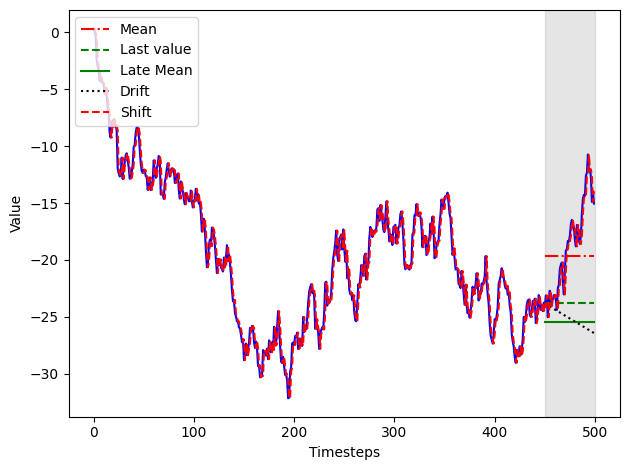

In [18]:
fig, ax = plt.subplots()
ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_late_mean'], 'g-', label='Late Mean')
ax.plot(test['pred_drift'], 'k:', label='Drift')
ax.plot(df_shift, 'r--', label='Shift')
ax.axvspan(len(train), len(train) + len(test), color='#808080', alpha=0.2)
ax.legend(loc=2)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

###Method Comparison

In [20]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_late = mean_squared_error(test['value'], test['pred_late_mean'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])
mse_shift = mean_squared_error(test['value'], df_shift[len(train):])

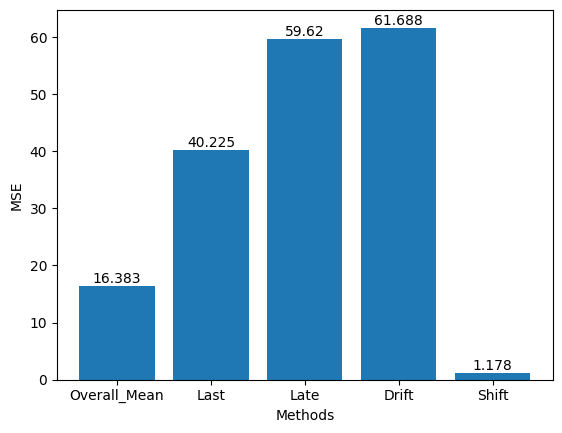

In [27]:
fig, ax = plt.subplots()
bars = ax.bar(['Overall_Mean', 'Last', 'Late', 'Drift', 'Shift'], [mse_mean, mse_last, mse_late, mse_drift, mse_shift])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
ax.set_ylabel('MSE')
ax.set_xlabel('Methods');